In [27]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [28]:
df = pd.read_csv('EV_Predictive_Maintenance_Dataset_15min.csv')

In [29]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Example: elapsed time in seconds since first measurement
df['ElapsedTime'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds()

In [36]:
print(df.head(0))

Empty DataFrame
Columns: [Timestamp, SoC, SoH, Battery_Voltage, Battery_Current, Battery_Temperature, Charge_Cycles, Motor_Temperature, Motor_Vibration, Motor_Torque, Motor_RPM, Power_Consumption, Brake_Pad_Wear, Brake_Pressure, Reg_Brake_Efficiency, Tire_Pressure, Tire_Temperature, Suspension_Load, Ambient_Temperature, Ambient_Humidity, Load_Weight, Driving_Speed, Distance_Traveled, Idle_Time, Route_Roughness, RUL, Failure_Probability, Maintenance_Type, TTF, Component_Health_Score, ElapsedTime]
Index: []

[0 rows x 31 columns]


In [30]:
#Split features & target
columns_to_drop = ['Timestamp','RUL','Failure_Probability','TTF','Component_Health_Score']
X = df.drop(columns=columns_to_drop , axis=1)
y_fp = df['Failure_Probability']

#train/test split
X_train, X_test, y_fp_train, y_fp_test = train_test_split(X, y_fp, test_size=0.2, random_state=42)


### **Classification**

In [31]:
model_fp = xgb.XGBClassifier()
model_fp.fit(X_train, y_fp_train)
y_fp_pred = model_fp.predict(X_test)

print("Failure Probability Accuracy:", accuracy_score(y_fp_test, y_fp_pred))
print(classification_report(y_fp_test, y_fp_pred))

Failure Probability Accuracy: 0.8991989509393085
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     31565
           1       0.04      0.00      0.00      3514

    accuracy                           0.90     35079
   macro avg       0.47      0.50      0.47     35079
weighted avg       0.81      0.90      0.85     35079




=== Training for target: RUL ===


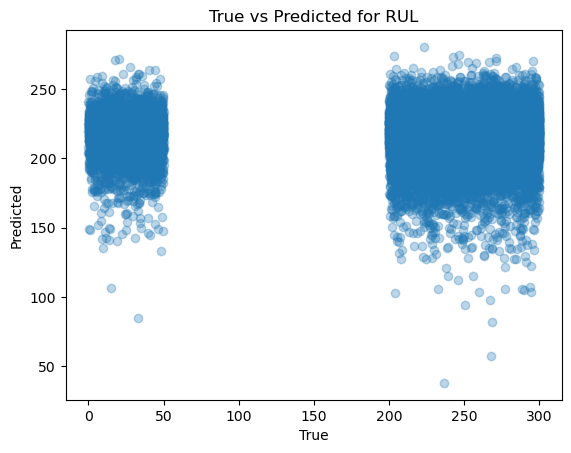


=== Training for target: TTF ===


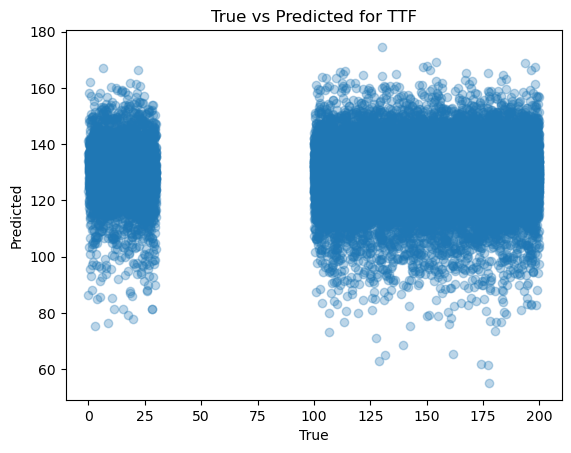


=== Training for target: Component_Health_Score ===


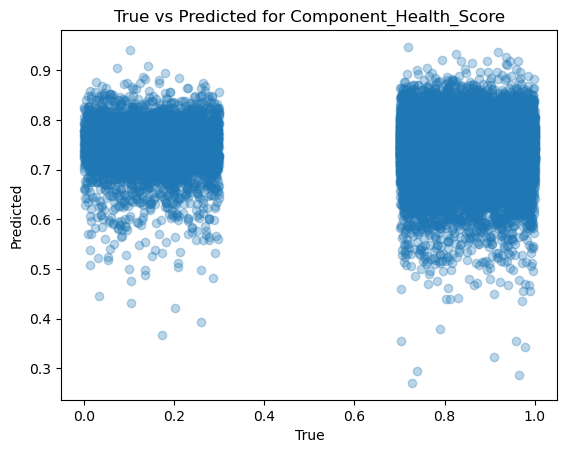


=== XGBoost Regressor Benchmark ===
                   Target        MAE          MSE       RMSE        R2  \
0                     RUL  61.306565  7491.973477  86.556187 -0.031431   
1                     TTF  42.492748  3104.739950  55.720193 -0.032462   
2  Component_Health_Score   0.188866     0.071743   0.267848 -0.030754   

     MAPE (%)  
0  638.155135  
1  447.982724  
2  385.802740  


In [32]:
TARGETS = ['RUL','TTF','Component_Health_Score']

results = []

for target in TARGETS:
    print(f"\n=== Training for target: {target} ===")

    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    results.append({
        'Target': target,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'MAPE (%)': mape
    })

    # Optional: Quick plot
    import matplotlib.pyplot as plt

    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"True vs Predicted for {target}")
    plt.show()

# -------------------------
# Show all results as a DataFrame
# -------------------------

results_df = pd.DataFrame(results)
print("\n=== XGBoost Regressor Benchmark ===")
print(results_df)
